# Social Data Science - Project:
*By **Janus, Gautam and Mathias** *

### Import Packages: 

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

### URL

In [378]:
url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip"
c=pd.read_csv(url, compression='zip')

url="http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip"
d=pd.read_csv(url, compression='zip')

c = c[['Accident_Index','Date','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions', 'Number_of_Casualties', 'Accident_Severity']]
d = d[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]

c.head()
d.head()
l = [c,d]
# joined = pd.concat(l,join_axes=[a.Accident_index]) #Works with axis=1, but has two columns of accident_index
joined = pd.merge(c, d, on='Accident_Index')

joined.head(10)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Date,Day_of_Week,Time,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Number_of_Casualties,Accident_Severity,Vehicle_Reference,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Vehicle_Type
0,2016010000005,01/11/2016,3,02:30,3,30.0,5,1,1,1,3,1,1,51,-1,8
1,2016010000005,01/11/2016,3,02:30,3,30.0,5,1,1,1,3,2,1,23,4,2
2,2016010000006,01/11/2016,3,00:37,3,30.0,4,1,1,1,3,1,2,36,1,9
3,2016010000008,01/11/2016,3,01:25,3,30.0,4,1,1,1,3,1,1,24,5,9
4,2016010000016,01/11/2016,3,09:15,3,30.0,1,1,1,1,3,1,1,55,7,11
5,2016010000018,01/11/2016,3,07:53,3,40.0,1,1,1,1,3,1,1,20,11,9
6,2016010000018,01/11/2016,3,07:53,3,40.0,1,1,1,1,3,2,1,28,-1,1
7,2016010000019,01/11/2016,3,09:29,3,30.0,1,1,1,1,3,1,2,30,10,9
8,2016010000019,01/11/2016,3,09:29,3,30.0,1,1,1,1,3,2,1,27,5,9
9,2016010000020,01/11/2016,3,08:53,5,30.0,1,1,1,1,3,1,1,33,2,8


### Plots

In [34]:
new = joined[['Sex_of_Driver']]
new_1 = pd.value_counts(new['Sex_of_Driver'])
# new_1.plot(kind='bar') Simple pl

In [357]:
#Convert clock into hour: 
t = joined['Time'].map(lambda x: str(x).split(':')[0])
e = t.apply(pd.to_numeric, errors='coerce')

In [520]:
#Loop to stack the number of accidents sorted by hours:
hour = []
number_of_accidents_hour = []
for i in range(24):
    hour.append(i)
    accidents_per_hour = len(joined[e == i])
    number_of_accidents_hour.append(accidents_per_hour)
#print(hour)
#print(number_of_accidents)

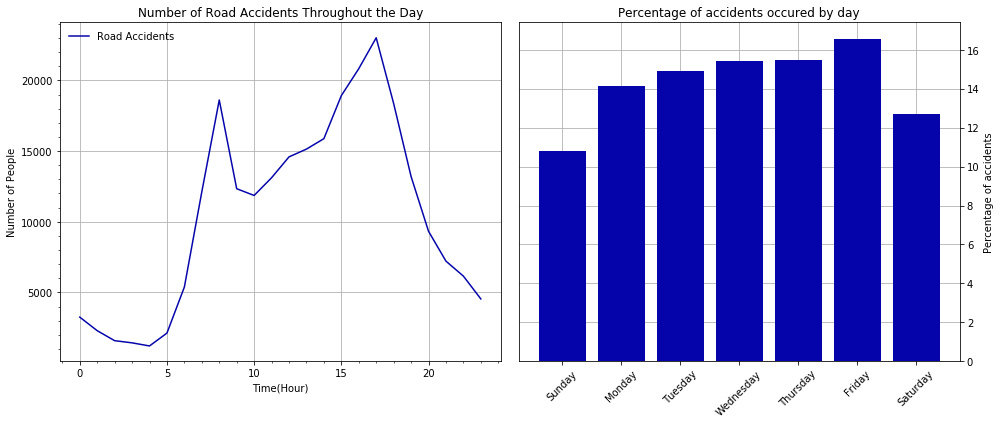

In [521]:
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax.plot(hour, number_of_accidents_hour, color='#0504aa')
ax.legend(['Road Accidents'],loc='upper left',frameon=False)
ax.set_title('Number of Road Accidents Throughout the Day')
ax.set_ylabel('Number of People')
ax.minorticks_on()
ax.set_xlabel('Time(Hour)')
ax.grid(True)

ax2.bar(x1_, y1, color='#0504aa', zorder=3)
ax2.set_ylabel('Percentage of accidents')
ax2.set_xticklabels(x2, rotation=45)
ax2.set_title("Percentage of accidents occured by day")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.grid(True, zorder=0)
fig.tight_layout()

plt.savefig('DayHour.png')

### DAYS

Percentage of accidents on sunday is 11%
Percentage of accidents on monday is 14%
Percentage of accidents on friday is17%


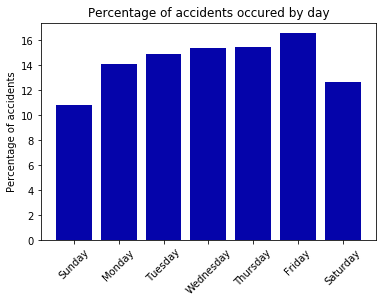

In [305]:
#Plot over days in the week:
sunday = len(joined[joined['Day_of_Week']==1])
monday = len(joined[joined['Day_of_Week']==2])
tuesday = len(joined[joined['Day_of_Week']==3])
wednesday = len(joined[joined['Day_of_Week']==4])
thursday = len(joined[joined['Day_of_Week']==5])
friday = len(joined[joined['Day_of_Week']==6])
saturday = len(joined[joined['Day_of_Week']==7])

total_accidents = sunday + monday + tuesday + wednesday + thursday + friday + saturday

sunday_pct = Sunday / total_accidents * 100
monday_pct = monday / total_accidents * 100
tuesday_pct = tuesday / total_accidents * 100
wednesday_pct = wednesday / total_accidents * 100
thursday_pct = thursday / total_accidents * 100
friday_pct = friday / total_accidents * 100
saturday_pct = saturday / total_accidents * 100

print("Percentage of accidents on sunday is {0:.0f}%".format(sunday_pct))
print("Percentage of accidents on monday is {0:.0f}%".format(monday_pct))
print("Percentage of accidents on friday is{0:.0f}%".format(friday_pct))

x1 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
x2 = ['','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] #Needed for subplots
y1 = [sunday_pct, monday_pct, tuesday_pct, wednesday_pct, thursday_pct, friday_pct, saturday_pct]
x1_ = list(range(len(x1)))


plt.bar(x1_, y1, color='#0504aa')
plt.ylabel('Percentage of accidents')
plt.xticks(x1_, x1, rotation=45)
plt.title("Percentage of accidents occured by day")
plt.show()

### Speeding

Percentage of accidents with a speed limit of 20 mph is 5%


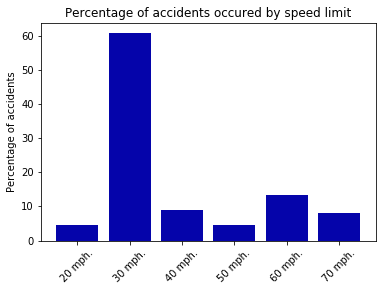

In [332]:
#Plot over speeding
speed_20 = len(joined[joined['Speed_limit']==20.0])
speed_30 = len(joined[joined['Speed_limit']==30.0])
speed_40 = len(joined[joined['Speed_limit']==40.0])
speed_50 = len(joined[joined['Speed_limit']==50.0])
speed_60 = len(joined[joined['Speed_limit']==60.0])
speed_70 = len(joined[joined['Speed_limit']==70.0])

total_accidents_speed = speed_20 + speed_30 + speed_40 + speed_50 + speed_60 + speed_70

speed_20_pct = speed_20 / total_accidents_speed * 100
speed_30_pct = speed_30 / total_accidents_speed * 100
speed_40_pct = speed_40 / total_accidents_speed * 100
speed_50_pct = speed_50 / total_accidents_speed * 100
speed_60_pct = speed_60 / total_accidents_speed * 100
speed_70_pct = speed_70 / total_accidents_speed * 100

print("Percentage of accidents with a speed limit of 20 mph is {0:.0f}%".format(speed_20_pct))

x = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
y = [speed_20_pct, speed_30_pct, speed_40_pct, speed_50_pct, speed_60_pct, speed_70_pct]
x_ = list(range(len(x)))

plt.bar(x_, y, color='#0504aa')
plt.ylabel('Percentage of accidents')
plt.xticks(x_, x, rotation=45)
plt.title("Percentage of accidents occured by speed limit")
plt.show()


Percentage of accidents with a speed limit of ... mph is 39%


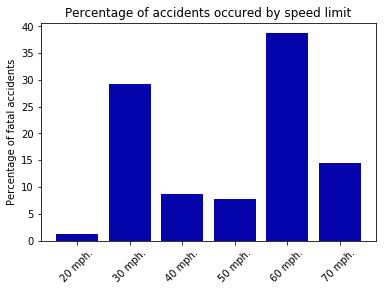

In [353]:
fataldata = joined[joined['Accident_Severity']==1]
speed_20_ = len(fataldata[fataldata['Speed_limit']==20.0])
speed_30_ = len(fataldata[fataldata['Speed_limit']==30.0])
speed_40_ = len(fataldata[fataldata['Speed_limit']==40.0])
speed_50_ = len(fataldata[fataldata['Speed_limit']==50.0])
speed_60_ = len(fataldata[fataldata['Speed_limit']==60.0])
speed_70_ = len(fataldata[fataldata['Speed_limit']==70.0])

total_accidents_ = speed_20_ + speed_30_ + speed_40_ + speed_50_ + speed_60_ + speed_70_

speed_20_pct_ = speed_20_ / total_accidents_ * 100
speed_30_pct_ = speed_30_ / total_accidents_ * 100
speed_40_pct_ = speed_40_ / total_accidents_ * 100
speed_50_pct_ = speed_50_ / total_accidents_ * 100
speed_60_pct_ = speed_60_ / total_accidents_ * 100
speed_70_pct_ = speed_70_ / total_accidents_ * 100

print("Percentage of accidents with a speed limit of ... mph is {0:.0f}%".format(speed_60_pct_))

x3 = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
x33 = ['','20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.'] #Needed for Subplot
y3 = [speed_20_pct_, speed_30_pct_, speed_40_pct_, speed_50_pct_, speed_60_pct_, speed_70_pct_]
x3_ = list(range(len(x3)))

plt.bar(x3_, y3, color='#0504aa')
plt.ylabel('Percentage of fatal accidents')
plt.xticks(x3_, x3, rotation=45)
plt.title("Percentage of accidents occured by speed limit")
plt.show()

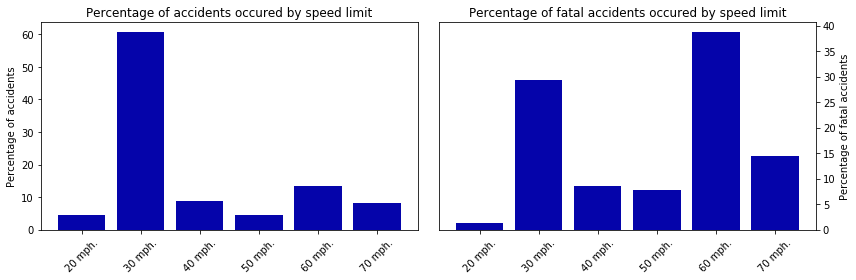

In [518]:
fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax3.bar(x_, y, color='#0504aa')
ax3.set_ylabel('Percentage of accidents')
ax3.set_xticklabels(x33, rotation=45)
ax3.set_title("Percentage of accidents occured by speed limit")

ax4.bar(x3_, y3, color='#0504aa')
ax4.set_ylabel('Percentage of fatal accidents')
ax4.set_xticklabels(x33, rotation=45)
ax4.set_title("Percentage of fatal accidents occured by speed limit")
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()

fig2.tight_layout()
plt.savefig('Speedlimit.png')

# Sex/Gender

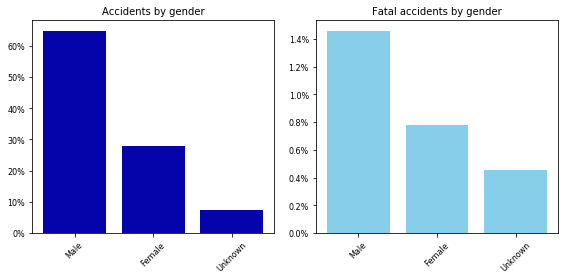

In [517]:
male = len(joined[joined['Sex_of_Driver']==1])
female = len(joined[joined['Sex_of_Driver']==2])
unknown = len(joined[joined['Sex_of_Driver']==3])

total_accidents_gender = male + female + unknown

male_pct = male / total_accidents_gender
female_pct = female / total_accidents_gender
unknown_pct = unknown / total_accidents_gender

x5 = ['Male', 'Female', 'Unknown']
x5_2 = ['','Male', 'Female', 'Unknown'] #Needed for Subplot
y5 = [male_pct, female_pct, unknown_pct]
x5_ = list(range(len(x5)))

gender = []
fatal_accident_per_gender = []
for i in range(1,4):
    gender.append(i)
    fatal_accident_per_gender.append(len(joined[(joined['Sex_of_Driver'] == i) & (joined['Accident_Severity'] == 1)]))
#print(gender)
#print(fatal_accident_per_gender)

#TEST for percentage of fatal accidents: 
test2 = np.array([male, female, unknown]) #dtype=np.float
test3 = np.array(fatal_accident_per_gender) #dtype=np.float
test = (test3 / test2)
#print(test)

fig4, (ax8, ax9) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax8.bar(x5, y5, color='#0504aa')
ax8.set_xticklabels(x5, rotation=45, size=8)
ax8.set_title("Accidents by gender", size=10)
vals2 = ax8.get_yticks()
ax8.set_yticklabels(['{:,.0%}'.format(x5) for x5 in vals2], size=8) #edit "1" to "2" if more decimals are needed.

ax9.bar(x5, test, color='skyblue')
ax9.set_xticklabels(x5, rotation=45, size=8)
ax9.set_title("Fatal accidents by gender", size=10)
vals = ax9.get_yticks()
ax9.set_yticklabels(['{:,.1%}'.format(x5) for x5 in vals], size=8) #edit "1" to "2" if more decimals are needed.

fig4.tight_layout()
plt.savefig('Gender.png')

### Age:

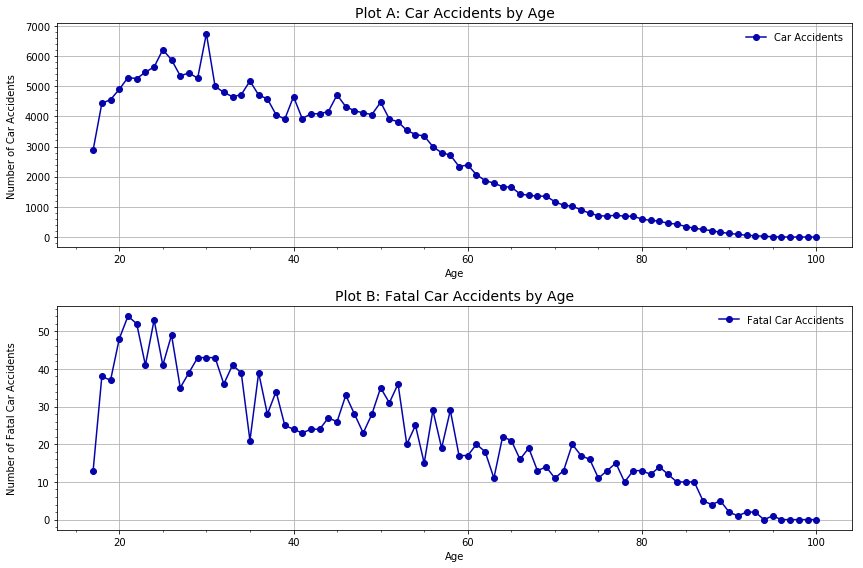

In [516]:
#Maybe create new seperate data set? 
#agedata = joined[joined['Accident_Severity']==1]

#We will only consider legal car drivers, which is 17 years old in UK. Focus on Car accidents in this one: 
age = []
accident_per_age = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age.append(i)
    accident_per_age.append(len(joined[(joined['Age_of_Driver'] == i) ]))
#print(age)
#print(accident_per_age)

age2 = []
accident_per_age2 = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age2.append(i)
    accident_per_age2.append(len(joined[(joined['Age_of_Driver'] == i) & (joined['Vehicle_Type'] == 9) & (joined['Accident_Severity'] == 1) ]))
#print(age2)
#print(accident_per_age2)

fig3, (ax6, ax7) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

#Figure 1: 
ax6.plot(age, accident_per_age, color='#0504aa', marker = 'o')
ax6.legend(['Car Accidents'],loc='upper right',frameon=False)
ax6.set_title('Plot A: Car Accidents by Age', size=14)
ax6.set_ylabel('Number of Car Accidents', size =10)
ax6.minorticks_on()
ax6.set_xlabel('Age', size =10)
ax6.get_yaxis().set_label_coords(-0.05,0.5)
ax6.grid(True)

#Figure2:
ax7.plot(age2, accident_per_age2, color='#0504aa', marker = 'o')
ax7.legend(['Fatal Car Accidents'],loc='upper right',frameon=False)
ax7.set_title('Plot B: Fatal Car Accidents by Age', size=14)
ax7.set_ylabel('Number of Fatal Car Accidents', size =10)
ax7.minorticks_on()
ax7.set_xlabel('Age', size =10)
ax7.grid(True)
ax7.get_yaxis().set_label_coords(-0.05,0.5)
fig3.tight_layout()
plt.savefig('AgeCar.png')


In [511]:
datedata = joined['Date']

#df.groupby(df['date'].dt.date)


str

01/01/2016
